In [79]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier

In [80]:
train_df = pd.read_csv('train.csv')

In [81]:
train_df.describe(include ='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [82]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [53]:
# train_df.iloc[:,0:]

In [54]:
# list(train_df)

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [56]:
# train_df['MSSubClass']

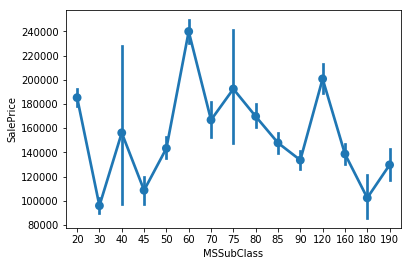

In [9]:
# compute average lable value for a given feature
sns.pointplot('MSSubClass','SalePrice',data = train_df)

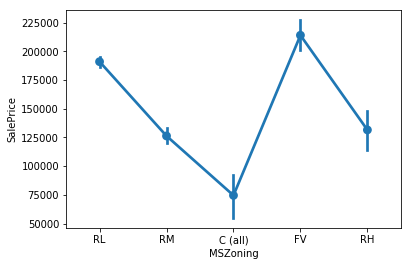

In [10]:
sns.pointplot('MSZoning','SalePrice',data = train_df)

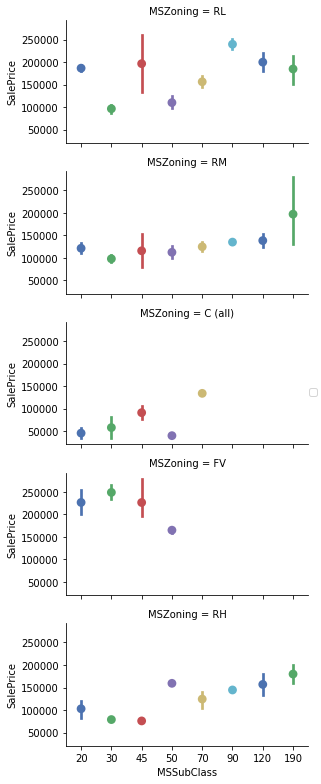

In [11]:
grid = sns.FacetGrid(train_df, row='MSZoning', size=2.2, aspect=2)
grid.map(sns.pointplot, 'MSSubClass', 'SalePrice',palette='deep')
grid.add_legend()

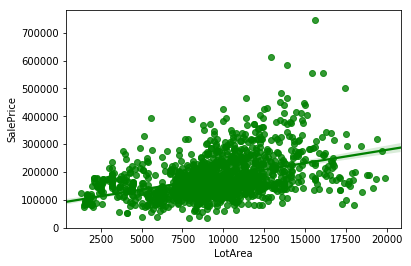

In [12]:
train_df.LotArea
sns.regplot(train_df.LotArea[train_df.LotArea < 20000], train_df.SalePrice[train_df.LotArea < 20000], color="g")

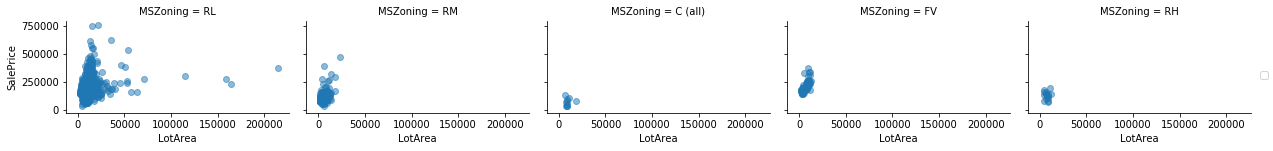

In [13]:
grid = sns.FacetGrid(train_df, col='MSZoning', size=2.2, aspect=1.6)
grid.map(plt.scatter, 'LotArea', 'SalePrice', alpha=.5)
grid.add_legend()

In [14]:
corr_matrix = train_df.corr()

In [20]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [16]:
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


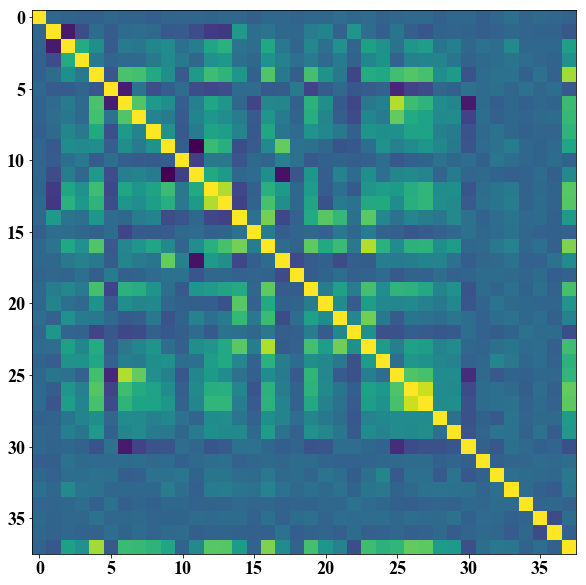

In [28]:
case = 1
if case == 1:
    %matplotlib notebook
    %matplotlib inline
elif case == 2:
    %matplotlib inline
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats('pdf')
elif case == 3:
    %matplotlib notebook
font = {'family' : 'times new roman',
        'weight' : 'regular',
        'size'   : 18}
matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))
plt.imshow(corr_matrix)

In [30]:
train_df.select_dtypes(include=[np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


In [36]:
train_df.select_dtypes(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [54]:
train_num = train_df.iloc[:,1:-1].select_dtypes(include=[np.number])
train_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,480,40,30,0,320,0,0,700,10,2009
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,636,255,57,0,0,0,0,0,8,2007
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,484,235,204,228,0,0,0,350,11,2009
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,468,90,0,205,0,0,0,0,4,2008
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,205,0,4,0,0,0,0,0,1,2008


In [56]:
train_cat = train_df.select_dtypes(include=['object'])
train_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [57]:
num_attribs = list(train_num)
num_attribs

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [58]:
cat_attribs = list(train_cat)
cat_attribs

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [115]:
#import numpy.ma as ma
from scipy import stats
from sklearn.utils import check_array

def _get_mask(X, value_to_mask):
    """Compute the boolean mask X == missing_values."""
    if value_to_mask == "NaN" or np.isnan(value_to_mask):
        return pd.isnull(X)
    else:
        return X == value_to_mask

class CatImputer(BaseEstimator, TransformerMixin):
    """Imputation transformer for completing missing values.
    Read more in the :ref:`User Guide <imputation>`.
    Parameters
    ----------
    missing_values : integer or "NaN", optional (default="NaN")
        The placeholder for the missing values. All occurrences of
        `missing_values` will be imputed. For missing values encoded as np.nan,
        use the string value "NaN".
    strategy : string, optional (default="most_frequent")
        The imputation strategy.
        - If "", then replace missing values using the mean along
          the axis.
        - If "", then replace missing values using the median along
          the axis.
        - If "most_frequent", then replace missing using the most frequent
          value along the axis.
    axis : integer, optional (default=0)
        The axis along which to impute.
        - If `axis=0`, then impute along columns.
        - If `axis=1`, then impute along rows.
    
    """
    def __init__(self, missing_values="NaN", strategy="most_frequent",
                 axis=0, copy=True):
        self.missing_values = missing_values
        self.strategy = strategy
        self.axis = axis
        self.copy = copy
    
    def fit(self, X, y=None):
        # Check parameters
        allowed_strategies = ["probability", "most_frequent"]
        if self.strategy not in allowed_strategies:
            raise ValueError("Can only use these strategies: {0} "
                             " got strategy={1}".format(allowed_strategies,
                                                        self.strategy))

        if self.axis not in [0]:
            raise ValueError("Can only impute missing values on axis 0 and 1, "
                             " got axis={0}".format(self.axis))

        #X = check_array(X)
        self.statistics_=self._dense_fit(X,
                                         self.strategy,
                                         self.missing_values,
                                         self.axis)
        return self
    
    def _dense_fit(self, X, strategy, missing_values, axis):
        mask = _get_mask(X, missing_values)
        
        if strategy == 'most_frequent':
            
            # To be able access the elements by columns
            if axis == 0:
                X = X.transpose()
                mask = mask.transpose()

            most_frequent = np.empty(X.shape[0],  dtype=object)

            for i, (row, row_mask) in enumerate(zip(X[:], mask[:])):
                row_mask = np.logical_not(row_mask).astype(np.bool)
                row = row[row_mask]
                cat = np.unique(row)
                counts = []
                for element in cat:
                    counts.append((row==element).sum())
                counts= np.array(counts)
                most_frequent[i] = cat[counts==counts.max()][0]
            return most_frequent

        
        if strategy == 'probability':
            
            if axis == 0:
                X = X.transpose()
                mask = mask.transpose()
            unique = []
            distri = []

            for i, (row, row_mask) in enumerate(zip(X[:], mask[:])):
                row_mask = np.logical_not(row_mask).astype(np.bool)
                row = row[row_mask]
                cat = np.unique(row)
                counts = []
                for element in cat:
                    counts.append((row==element).sum())
                unique.append(cat)
                distri.append(counts/sum(counts))
                

            return unique, distri
    
    def transform(self, X):
        X = np.copy(X)
        statistics = self.statistics_
        if self.strategy == 'most_frequent':
            
            mask = _get_mask(X, self.missing_values)
            n_missing = np.sum(mask, axis=self.axis) # get the number of missing values
            values = np.repeat(statistics, n_missing) # np.repeat returns an array by repeat statistics[i] for n_missing[i] times
            if self.axis == 0:
                coordinates = np.where(mask.transpose())[::-1] #np.where returns the index, i.e. location of ones
            else:
                coordinates = mask

            X[coordinates] = values
            
        if self.strategy == 'probability':
            unique_letter, norm_counts = statistics
            mask = _get_mask(X, self.missing_values)
            n_missing = np.sum(mask, axis=self.axis)
            total_missing = np.sum(mask)
            rand_v = np.random.random(total_missing)
            
            #values = np.empty(total_missing, dtype=str)
            values = [None]*total_missing # bug will occur if we use np.empty()
            ind = 0
            for k, (i,j) in enumerate(zip(unique_letter,norm_counts)):
                n_miss = n_missing[k]
                j_cumsum = np.cumsum(np.array(j))
                value_temp = np.repeat(max(i,key=len),n_miss)
                value_temp[:] = i[-1]
                rand_v_temp = rand_v[ind:ind+n_miss]
                for j_ind in np.arange(len(j)):
                    if j_ind == 0:
                        value_temp[(rand_v_temp > 0) & (rand_v_temp < j_cumsum[j_ind])] = i[j_ind]
                    else:
                        value_temp[(rand_v_temp > j_cumsum[j_ind-1]) & (rand_v_temp < j_cumsum[j_ind])] = i[j_ind]
                values[ind:ind+n_miss] = value_temp
                ind = ind+n_miss
            coordinates = np.where(mask.transpose())[::-1]
            X[coordinates] = values
            
        return X

In [116]:
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureRemover(BaseEstimator, TransformerMixin):
    '''
    This class is used to remove some features that have a lot of NaN values which exceeds certain threshold value.
    
    Parameters:
    -----------------------
    threshold: float, between 0 and 1. Remove feature if number of nan's exceeds this value.
    
    '''
    def __init__(self, threshold=0.3):
        self.threshold = threshold
    def fit(self, X, y=None):
        '''
        Parameter:
        X : Pandas DataFrame
        '''
        isnull = pd.isnull(X)
        nan_numbers=isnull.values.sum(axis=0)
        self.nan_ratio = nan_numbers/isnull.shape[0]
        features = list(isnull)
        temp = np.array(features)
        self.feature_to_remove = temp[self.nan_ratio > self.threshold]
        
        return self
    def transform(self, X):
        feature_to_remove = self.feature_to_remove
        return X.drop(feature_to_remove, axis=1)


In [140]:
featureRemover = FeatureRemover()
train_df_after_remove = featureRemover.fit_transform(train_df)

In [118]:
train_df_after_remove.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [293]:
from sklearn.base import BaseEstimator
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be an array-like of integers or
    strings, denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot (aka one-of-K or dummy)
    encoding scheme (``encoding='onehot'``, the default) or converted
    to ordinal integers (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories must be sorted and should not mix
          strings and numeric values.
        The used categories can be found in the ``categories_`` attribute.
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros. In the inverse transform, an unknown category
        will be denoted as None.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting
        (in order corresponding with output of ``transform``).
    Examples
    --------
    Given a dataset with two features, we let the encoder find the unique
    values per feature and transform the data to a binary one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> X = [['Male', 1], ['Female', 3], ['Female', 2]]
    >>> enc.fit(X)
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.categories_
    [array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
    >>> enc.transform([['Female', 1], ['Male', 4]]).toarray()
    array([[ 1.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  0.,  0.,  0.]])
    >>> enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])
    array([['Male', 1],
           [None, 2]], dtype=object)
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        if self.categories != 'auto':
            for cats in self.categories:
                if not np.all(np.sort(cats) == np.array(cats)):
                    raise ValueError("Unsorted categories are not yet "
                                     "supported")

        X_temp = check_array(X, dtype=None)
        if not hasattr(X, 'dtype') and np.issubdtype(X_temp.dtype, np.str_):
            X = check_array(X, dtype=np.object)
        else:
            X = X_temp

        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                if self.handle_unknown == 'error':
                    valid_mask = np.in1d(Xi, self.categories[i])
                    if not np.all(valid_mask):
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(self.categories[i])

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using specified encoding scheme.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X_temp = check_array(X, dtype=None)
        if not hasattr(X, 'dtype') and np.issubdtype(X_temp.dtype, np.str_):
            X = check_array(X, dtype=np.object)
        else:
            X = X_temp

        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            Xi = X[:, i]
            valid_mask = np.in1d(Xi, self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    Xi = Xi.copy()
                    Xi[~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(Xi)

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        feature_indices = np.cumsum(n_values)

        indices = (X_int + feature_indices[:-1]).ravel()[mask]
        indptr = X_mask.sum(axis=1).cumsum()
        indptr = np.insert(indptr, 0, 0)
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csr_matrix((data, indices, indptr),
                                shape=(n_samples, feature_indices[-1]),
                                dtype=self.dtype)
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

    def inverse_transform(self, X):
        """Convert back the data to the original representation.
        In case unknown categories are encountered (all zero's in the
        one-hot encoding), ``None`` is used to represent this category.
        Parameters
        ----------
        X : array-like or sparse matrix, shape [n_samples, n_encoded_features]
            The transformed data.
        Returns
        -------
        X_tr : array-like, shape [n_samples, n_features]
            Inverse transformed array.
        """
        check_is_fitted(self, 'categories_')
        X = check_array(X, accept_sparse='csr')

        n_samples, _ = X.shape
        n_features = len(self.categories_)
        n_transformed_features = sum([len(cats) for cats in self.categories_])

        # validate shape of passed X
        msg = ("Shape of the passed X data is not correct. Expected {0} "
               "columns, got {1}.")
        if self.encoding == 'ordinal' and X.shape[1] != n_features:
            raise ValueError(msg.format(n_features, X.shape[1]))
        elif (self.encoding.startswith('onehot')
                and X.shape[1] != n_transformed_features):
            raise ValueError(msg.format(n_transformed_features, X.shape[1]))

        # create resulting array of appropriate dtype
        dt = np.find_common_type([cat.dtype for cat in self.categories_], [])
        X_tr = np.empty((n_samples, n_features), dtype=dt)

        if self.encoding == 'ordinal':
            for i in range(n_features):
                labels = X[:, i].astype('int64')
                X_tr[:, i] = self.categories_[i][labels]

        else:  # encoding == 'onehot' / 'onehot-dense'
            j = 0
            found_unknown = {}

            for i in range(n_features):
                n_categories = len(self.categories_[i])
                sub = X[:, j:j + n_categories]

                # for sparse X argmax returns 2D matrix, ensure 1D array
                labels = np.asarray(_argmax(sub, axis=1)).flatten()
                X_tr[:, i] = self.categories_[i][labels]

                if self.handle_unknown == 'ignore':
                    # ignored unknown categories: we have a row of all zero's
                    unknown = np.asarray(sub.sum(axis=1) == 0).flatten()
                    if unknown.any():
                        found_unknown[i] = unknown

                j += n_categories

            # if ignored are found: potentially need to upcast result to
            # insert None values
            if found_unknown:
                if X_tr.dtype != object:
                    X_tr = X_tr.astype(object)

                for idx, mask in found_unknown.items():
                    X_tr[mask, idx] = None

        return X_tr

In [338]:
catImputer = CatImputer(strategy = 'probability')
#catImputer = CatImputer()
train_df_cat = train_df_after_remove.select_dtypes(include=['object'])
train_df_num = train_df_after_remove.select_dtypes(include=[np.number])
train_df_cat_noNan = catImputer.fit_transform(train_df_cat.values)

In [308]:
categoricalEncoder = CategoricalEncoder()

In [309]:
train_df_cat_hot_encoder = categoricalEncoder.fit_transform(train_df_cat_noNan)

In [310]:
train_df_cat_noNan.shape

(1460, 38)

In [311]:
train_df_cat_hot_encoder.toarray().shape

(1460, 238)

In [312]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
imputer.fit_transform(train_df_num)

array([[  1.00000000e+00,   6.00000000e+01,   6.50000000e+01, ...,
          2.00000000e+00,   2.00800000e+03,   2.08500000e+05],
       [  2.00000000e+00,   2.00000000e+01,   8.00000000e+01, ...,
          5.00000000e+00,   2.00700000e+03,   1.81500000e+05],
       [  3.00000000e+00,   6.00000000e+01,   6.80000000e+01, ...,
          9.00000000e+00,   2.00800000e+03,   2.23500000e+05],
       ..., 
       [  1.45800000e+03,   7.00000000e+01,   6.60000000e+01, ...,
          5.00000000e+00,   2.01000000e+03,   2.66500000e+05],
       [  1.45900000e+03,   2.00000000e+01,   6.80000000e+01, ...,
          4.00000000e+00,   2.01000000e+03,   1.42125000e+05],
       [  1.46000000e+03,   2.00000000e+01,   7.50000000e+01, ...,
          6.00000000e+00,   2.00800000e+03,   1.47500000e+05]])

In [313]:
sum_1 = 0
unique_num_col = []
for i in range(b):
    sum_1 = sum_1 + len(np.unique(train_df_cat_noNan[:,i]))
    unique_num_col.append(len(np.unique(train_df_cat_noNan[:,i])))

In [291]:
unique_num_col

[5,
 2,
 4,
 4,
 2,
 5,
 3,
 25,
 9,
 8,
 5,
 8,
 6,
 8,
 15,
 16,
 6,
 4,
 5,
 6,
 4,
 4,
 4,
 6,
 6,
 6,
 5,
 2,
 5,
 4,
 7,
 9,
 3,
 5,
 5,
 3,
 9,
 6]

In [300]:
unique_num_col

[5,
 2,
 4,
 4,
 2,
 5,
 3,
 25,
 9,
 8,
 5,
 8,
 6,
 8,
 15,
 16,
 4,
 4,
 5,
 6,
 4,
 4,
 4,
 6,
 6,
 6,
 5,
 2,
 5,
 4,
 7,
 6,
 3,
 5,
 5,
 3,
 9,
 6]

In [301]:
temp = [5,
 2,
 4,
 4,
 2,
 5,
 3,
 25,
 9,
 8,
 5,
 8,
 6,
 8,
 15,
 16,
 6,
 4,
 5,
 6,
 4,
 4,
 4,
 6,
 6,
 6,
 5,
 2,
 5,
 4,
 7,
 9,
 3,
 5,
 5,
 3,
 9,
 6]

In [304]:
np.array(temp) == np.array(unique_num_col)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [306]:
np.unique(train_df_cat_noNan[:,16])

array(['BrkCmn', 'BrkFace', 'None', 'Stone'], dtype=object)

In [314]:
np.unique(train_df_cat_noNan[:,16])

array(['BrkCmn', 'BrkFa', 'BrkFace', 'None', 'Stone'], dtype=object)

In [331]:
train_df_cat.values[:,16][pd.isnull(train_df_cat.values[:,16])] = 'asbdsa'

In [332]:
np.unique(train_df_cat.values[:,16])

array(['BrkCmn', 'BrkFace', 'None', 'Stone', 'asbdsa'], dtype=object)

In [333]:
train_df_cat.values[:,16]

array(['BrkFace', 'None', 'BrkFace', ..., 'None', 'None', 'None'], dtype=object)

In [339]:
np.sum(pd.isnull(train_df_cat.values[:,16]))

8

In [340]:
train_df_cat_temp = train_df_cat.values[:,16][~pd.isnull(train_df_cat.values[:,16])]

In [342]:
np.unique(train_df_cat_temp)

array(['BrkCmn', 'BrkFace', 'None', 'Stone'], dtype=object)

In [396]:
i = np.unique(train_df_cat_temp)

In [399]:
np.array(i[1])

array('BrkFace',
      dtype='<U7')

In [345]:
counts = []
for element in i:
    counts.append(sum(train_df_cat_temp == element))
# j = train_df_cat_temp

In [347]:
j = counts/sum(counts)

In [349]:
counts

[15, 445, 864, 128]

In [ ]:
# for k, (i,j) in enumerate(zip(unique_letter,norm_counts)):
n_miss = 8
j_cumsum = np.cumsum(np.array(j))
value_temp = np.repeat(i[-1],n_miss,dtype=)
rand_v_temp = rand_v[ind:ind+n_miss]
for j_ind in np.arange(len(j)):
    if j_ind == 0:
        value_temp[(rand_v_temp > 0) & (rand_v_temp < j_cumsum[j_ind])] = i[j_ind]
    else:
        value_temp[(rand_v_temp > j_cumsum[j_ind-1]) & (rand_v_temp < j_cumsum[j_ind])] = i[j_ind]
values[ind:ind+n_miss] = value_temp
ind = ind+n_miss

In [350]:
n_miss = 8

In [441]:
value_temp = np.repeat(max(i,key=len),8)

In [443]:
value_temp[:] = i[-1]

In [445]:
value_temp[:] = max(i,key=len)

In [446]:
value_temp

array(['asdfasdfasfas', 'asdfasdfasfas', 'asdfasdfasfas', 'asdfasdfasfas',
       'asdfasdfasfas', 'asdfasdfasfas', 'asdfasdfasfas', 'asdfasdfasfas'],
      dtype='<U13')

In [351]:
j_cumsum = np.cumsum(np.array(j))

In [352]:
j_cumsum

array([ 0.01033058,  0.31680441,  0.91184573,  1.        ])

In [353]:
value_temp = np.repeat(i[-1],n_miss)

In [354]:
value_temp

array(['Stone', 'Stone', 'Stone', 'Stone', 'Stone', 'Stone', 'Stone',
       'Stone'],
      dtype='<U5')

In [ ]:
# rand_v_temp = rand_v[ind:ind+n_miss]

In [376]:
rand_v_temp = np.random.random(n_miss)

In [377]:
for j_ind in np.arange(len(j)):
    if j_ind == 0:
        value_temp[(rand_v_temp > 0) & (rand_v_temp < j_cumsum[j_ind])] = i[j_ind]
    else:
        value_temp[(rand_v_temp > j_cumsum[j_ind-1]) & (rand_v_temp < j_cumsum[j_ind])] = i[j_ind]

In [378]:
value_temp

array(['BrkCm', 'BrkFa', 'BrkCm', 'Stone', 'Stone', 'BrkFa', 'BrkFa',
       'None'],
      dtype='<U5')

In [366]:
np.random.random(n_miss)

array([ 0.44111358,  0.2331861 ,  0.52503895,  0.20746492,  0.42193121,
        0.91674906,  0.12361376,  0.88936936])

In [385]:
i[1]

'BrkFace'

In [386]:
value_temp

array(['BrkCm', 'BrkFa', 'BrkCm', 'Stone', 'Stone', 'BrkFa', 'BrkFa',
       'None'],
      dtype='<U5')

In [404]:
value_temp[0] = np.array('BrkFadfaokosdf')

In [405]:
value_temp

array(['BrkFa', 'BrkFa', 'BrkCm', 'Stone', 'Stone', 'BrkFa', 'BrkFa',
       'None'],
      dtype='<U5')

In [406]:
value_temp

array(['BrkFa', 'BrkFa', 'BrkCm', 'Stone', 'Stone', 'BrkFa', 'BrkFa',
       'None'],
      dtype='<U5')

In [407]:
np.array('BrkFadfaokosdf')

array('BrkFadfaokosdf',
      dtype='<U14')

In [438]:
max(i,key=len)

'asdfasdfasfas'

In [435]:
i[0] = 'asdfasdfasfas'

# my original backup - there are bugs in it and not fixed yet

In [296]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

def _get_mask(X, value_to_mask):
    """Compute the boolean mask X == missing_values."""
    if value_to_mask == "NaN" or np.isnan(value_to_mask):
        return np.isnan(X)
    else:
        return X == value_to_mask
    


from sklearn.base import BaseEstimator, TransformerMixin
class CatImputer(BaseEstimator, TransformerMixin):
    def __init__(self, missing_values="NaN", strategy="most_frequent", axis=0, verbose=0, copy=True):
        self.missing_values = missing_values
        self.strategy = strategy
        self.axis = axis
        self.verbose = verbose
        self.copy = copy
    #    def fit(self, X, y=None):
    #        return self
    def _dense_fit(self, X, strategy, missing_values, axis):
        X = check_array(X)
        mask = _get_mask(X, missing_values)
        if strategy == "most_frequent":
            if axis == 0:
                X = X.transpose()
                mask = mask.transpose()
            most_frequent = np.empty(X.shape[0])
            for i, (row, row_mask) in enumerate(zip(X[:], mask[:])):
                row_mask = np.logical_not(row_mask).astype(np.bool)
                row = row[row_mask]
                a = np.unique(row)
                k = np.zeros(len(a))
                for ii, i in enumerate(a):
                    k[ii] = sum(row == i)
                most_frequent[i] = a[k == k.max()][0]
            return most_frequent
        if strategy == "probability":
            if axis == 0:
                X = X.transpose()
                mask = mask.transpose()
            unique_letter = []
            norm_counts = []

            for i, (row, row_mask) in enumerate(zip(X[:], mask[:])):
                row_mask = np.logical_not(row_mask).astype(np.bool)
                row = row[row_mask]
                a = np.unique(row)
                k = np.zeros(len(a))
                for ii, i in enumerate(a):
                    k[ii] = sum(row == i)
                unique_letter.append(a)
                norm_counts.append(k/k.sum())
        return unique_letter, norm_counts

    def fit(self, X, y=None):
        # Check parameters
        allowed_strategies = ["most_frequent", "probability"]
        if self.strategy not in allowed_strategies:
            raise ValueError("Can only use these strategies: {0} " 
                             " got strategy={1}".format(allowed_strategies, self.strategy))
        self.statistics_ = self._dense_fit(X,
                                            self.strategy,
                                            self.missing_values,
                                            self.axis)

    def transform(self, X):
        X = check_array(X,copy=self.copy)
        statistics = self.statistics_
        
        if self.strategy == "most_frequent":
            invalid_mask = np.isnan(statistics)
            valid_mask = np.logical_not(invalid_mask)
            valid_statistics = statistics[valid_mask]
            valid_statistics_indexes = np.where(valid_mask)[0]
            missing = np.arange(X.shape[not self.axis])[invalid_mask]

            mask = _get_mask(X, self.missing_values)
            #mask = _get_mask(X, self.missing_values)
            n_missing = np.sum(mask, axis=self.axis)
            values = np.repeat(valid_statistics, n_missing)
            coordinates = np.where(mask.transpose())[::-1]
            X[coordinates] = values
            
        if self.strategy == "probability":
            #invalid_mask = np.isnan(statistics)
            #valid_mask = np.logical_not(invalid_mask)
            #valid_statistics = statistics[valid_mask]
            #valid_statistics_indexes = np.where(valid_mask)[0]
            #missing = np.arange(X.shape[not self.axis])[invalid_mask]
            unique_letter, norm_counts = statistics
            mask = _get_mask(X, self.missing_values)
            #mask = _get_mask(X, self.missing_values)
            n_missing = np.sum(mask, axis=self.axis)
            tot_missing = np.sum(mask)
            rand_v = np.random.random(tot_missing)
            values = np.empty(tot_missing,dtype=str)
            ind = 0
            for k, (i,j) in enumerate(zip(unique_letter,norm_counts)):
                n_miss = n_missing(k)
                j_cumsum = np.cumsum(np.array(j))
                value_temp = np.repeat(i[-1],n_miss)
                rand_v_temp = rand_v[ind:ind+n_miss]
                for j_ind in np.arange(len(j)):
                    if j_ind == 0:
                        value_temp[(rand_v_temp > 0) & (rand_v_temp < j_cumsum[j_ind])] = i[j_ind]
                    else:
                        value_temp[(rand_v_temp > j_cumsum[j_ind-1]) & (rand_v_temp < j_cumsum[j_ind])] = i[j_ind]
                values[ind:ind+n_miss] = value_temp
                ind = ind+n_miss
            # values = np.repeat(valid_statistics, n_missing)
            coordinates = np.where(mask.transpose())[::-1]
            X[coordinates] = values
